# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

## Откройте и изучите файл

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

Импортируем ряд библиотек необходимых для анализа.

In [2]:
try:
    data = pd.read_csv('C:/Users/Денис/Desktop/python/model1/users_behavior.csv')
except:
    data = pd.read_csv('/datasets/users_behavior.csv')

Считываем данные.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


Из представленных данных видно, что пропущенных данных нет. формат данных соответствует необходимым.

Описательная статистика:
Среднее: 63.04±0.59
Медиана: 62.0, межквартильный размах: 42.0
Минимальное значение: 0.0. Максимальное значение: 244.0.


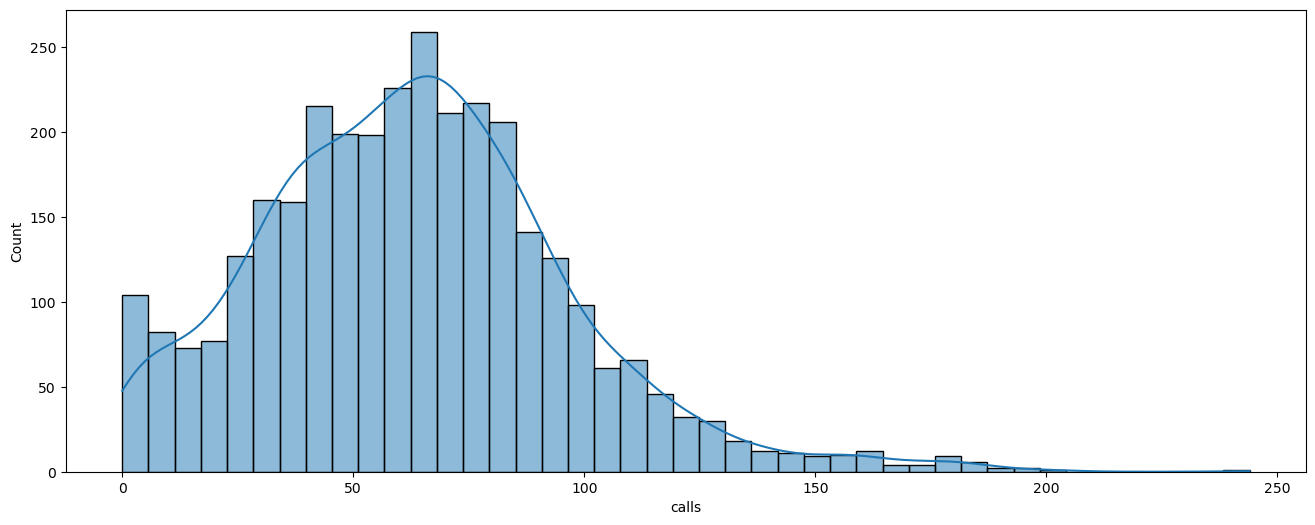

In [4]:
plt.figure(figsize=(16, 6))
g = sns.histplot(data=data, x=data['calls'], kde=True)
stat = data['calls'].describe()
print(f'Описательная статистика:\n'
      f'Среднее: {round(stat[1],2)}±{round(stat[2]/math.sqrt(stat[0]),2)}\n'
      f'Медиана: {round(stat[5],2)}, межквартильный размах: {round(stat[6]-stat[4],2)}\n'
      f'Минимальное значение: {round(stat[3],2)}. Максимальное значение: {round(stat[7],2)}.' );
for i in range(len(data['calls'])):
    if data.loc[i,'calls'] > 150:
        data.loc[i,'calls'] = 150
        

Распределение количества звонков на графике выглядит хорошо. Имеет форму нормального распределения.
Исправлять данные нет необходимости.
на последнем этапе убрал хвост и вместо всех значений больше 150 минут поставили 150 минут.
Сделано это было потому, что кто-то в чате написал, что никто не набрал Accuracy больше 0,8. Ну я решил сделать. Для этого немного подрезались пару переменных.

Описательная статистика:
Среднее: 438.21±4.14
Медиана: 430.6, межквартильный размах: 297.35
Минимальное значение: 0.0. Максимальное значение: 1632.06.


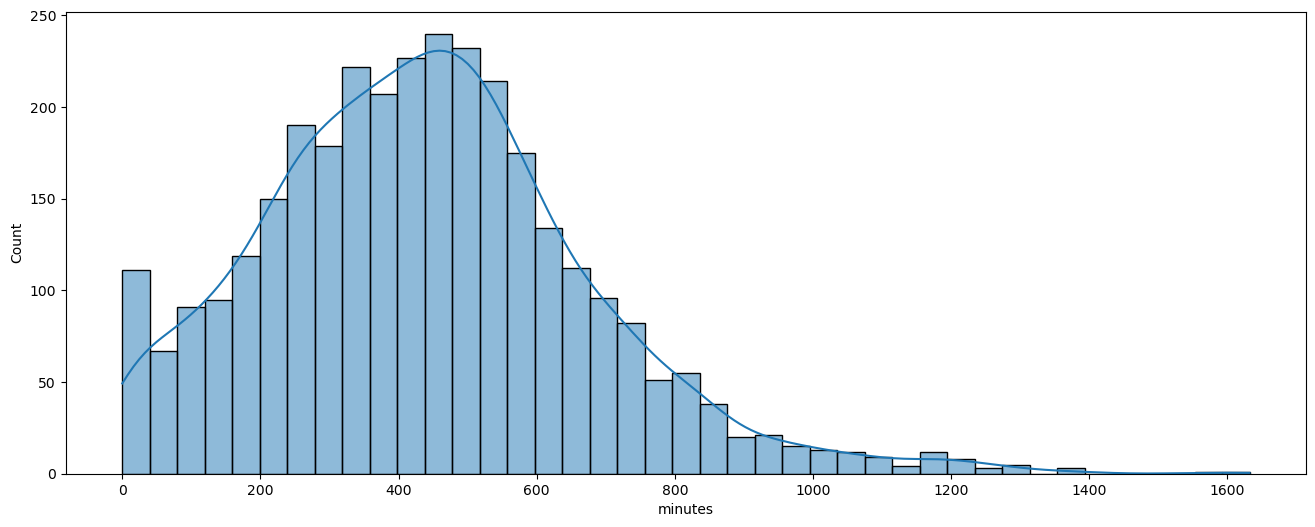

In [5]:
plt.figure(figsize=(16, 6))
g = sns.histplot(data=data, x=data['minutes'], kde=True)
stat = data['minutes'].describe()
print(f'Описательная статистика:\n'
      f'Среднее: {round(stat[1],2)}±{round(stat[2]/math.sqrt(stat[0]),2)}\n'
      f'Медиана: {round(stat[5],2)}, межквартильный размах: {round(stat[6]-stat[4],2)}\n'
      f'Минимальное значение: {round(stat[3],2)}. Максимальное значение: {round(stat[7],2)}.' );

for i in range(len(data['minutes'])):
    if data.loc[i,'minutes'] > 1000:
        data.loc[i,'minutes'] = 1000
       

Распределение данных по количеству минут также имеет форму нормаьного распределения. обрезаны данные выше 1000 минут, с целью улучшения модели.

Описательная статистика:
Среднее: 38.28±0.64
Медиана: 30.0, межквартильный размах: 48.0
Минимальное значение: 0.0. Максимальное значение: 224.0.


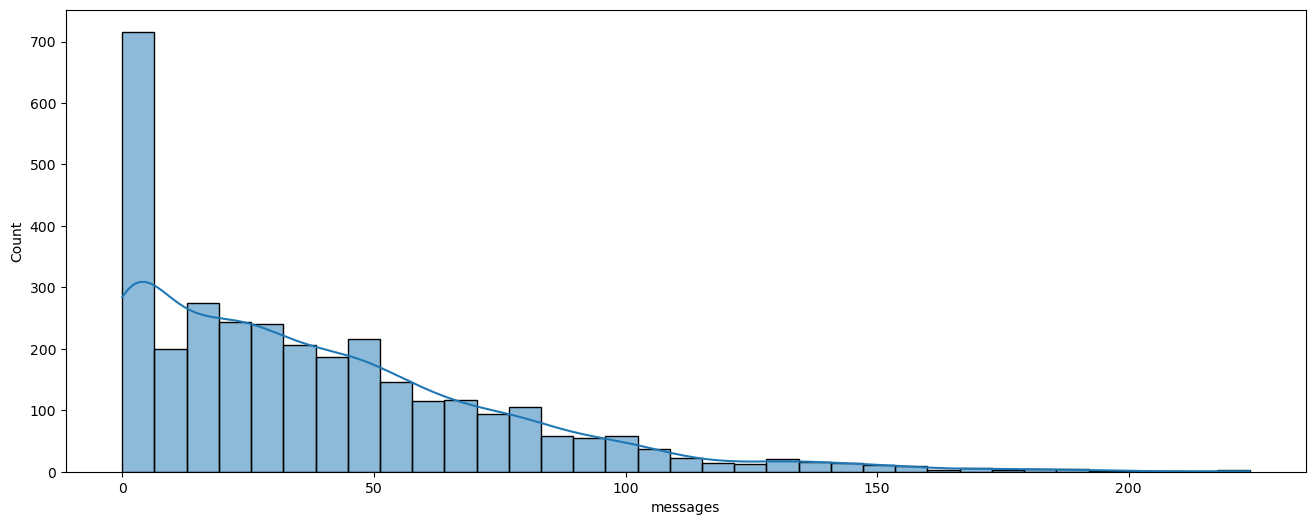

In [6]:
plt.figure(figsize=(16, 6))
g = sns.histplot(data=data, x=data['messages'], kde=True)
stat = data['messages'].describe()
print(f'Описательная статистика:\n'
      f'Среднее: {round(stat[1],2)}±{round(stat[2]/math.sqrt(stat[0]),2)}\n'
      f'Медиана: {round(stat[5],2)}, межквартильный размах: {round(stat[6]-stat[4],2)}\n'
      f'Минимальное значение: {round(stat[3],2)}. Максимальное значение: {round(stat[7],2)}.' );

Количество сообщений сильно разнится по количеству. Есть люди которые совсем не пишут сообщения. форма распределения не нормальная.

Описательная статистика:
Среднее: 17207.67±133.55
Медиана: 16943.24, межквартильный размах: 8932.8
Минимальное значение: 0.0. Максимальное значение: 49745.73.


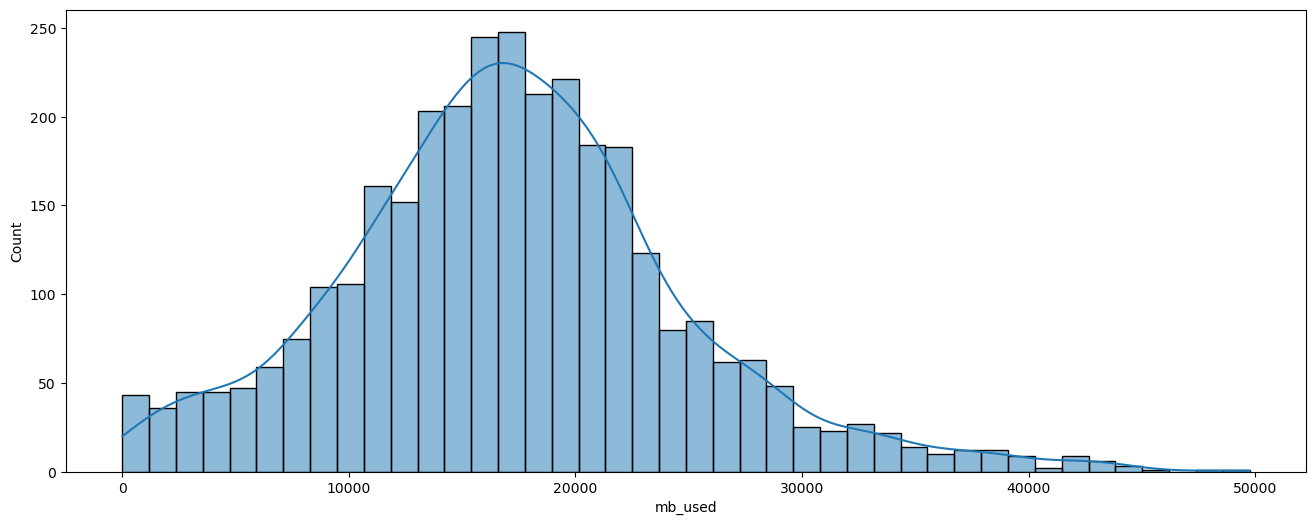

In [7]:
plt.figure(figsize=(16, 6))
g = sns.histplot(data=data, x=data['mb_used'], kde=True)
stat = data['mb_used'].describe()
print(f'Описательная статистика:\n'
      f'Среднее: {round(stat[1],2)}±{round(stat[2]/math.sqrt(stat[0]),2)}\n'
      f'Медиана: {round(stat[5],2)}, межквартильный размах: {round(stat[6]-stat[4],2)}\n'
      f'Минимальное значение: {round(stat[3],2)}. Максимальное значение: {round(stat[7],2)}.' );

Форма распределения по количеству трафика имеет практически идеальный вид нормального распределения.

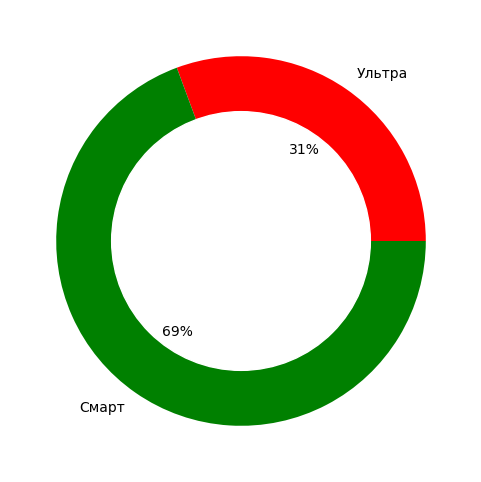

In [8]:
names = ['Ультра', 'Смарт']
plt.figure(figsize=(6, 6))

size = [data['is_ultra'].sum()/len(data['is_ultra']),1-data['is_ultra'].sum()/len(data['is_ultra'])]
 
# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color='white')

# Give color names
plt.pie(size, labels=names, colors=['red','green'], autopct='%1.f%%')
p = plt.gcf()
p.gca().add_artist(my_circle)

# Show the graph
plt.show()

Количество пользователей тарифа ультра практически в два раза ниже. очевидно , что больше людей предпочитают Смарт

## Разбейте данные на выборки

In [9]:
predict = data.drop(['is_ultra'], axis=1)
target = data['is_ultra']

predict_train, predict_test_vr, target_train, target_test_vr = train_test_split(predict, target, test_size=0.40, random_state=12345)

predict_valid, predict_test, target_valid, target_test = train_test_split(predict_test_vr, target_test_vr, test_size=0.50, random_state=12345)


Рапределили выборки на 3 части 60/20/20 обучающая/валидирующая/тестовая

## Исследуйте модели

In [10]:
#predict_train, target_train, predict_valid, predict_test, target_valid, target_test
best_model = None
best_result = 0
for i in range(1,11):
    model = DecisionTreeClassifier(random_state=12345, max_depth=i)
    model.fit(predict_train, target_train)
    result = model.score(predict_valid, target_valid)
    if result > best_result:
        best_result = result 
        best_max_depth = i
print(f'best max_depth = {best_max_depth} : {best_result}')

best max_depth = 3 : 0.7853810264385692


посмотрели оптимальную глубину дерева. Оптимальным оказалась глубина 3. Что в принципе предсказуемо, так как переменных немного

In [11]:
best_model = None
best_result = 0
for est in range(1, 11):
    model = RandomForestClassifier(random_state=12345, n_estimators=est) # обучите модель с заданным количеством деревьев
    model.fit(predict_train, target_train) # обучите модель на тренировочной выборке
    result = model.score(predict_valid, target_valid) # посчитайте качество модели на валидационной выборке
    if result > best_result:
        best_result = result # сохраните наилучшую модель
        best_n_estimators = est#  сохраните наилучшее значение метрики accuracy на валидационных данных

print(f'best_n_estimators = {best_n_estimators} : {best_result}')

best_n_estimators = 10 : 0.7838258164852255


Подбор количества рандомных деревьев показал оптимальное количество в 10

In [12]:
model = LogisticRegression(solver='liblinear',
    # норма для регуляризации. 
    penalty='l2',
    # параметр регуляризации. Чем меньше, тем сильнее регуляризация. Положительный.
    C=1,
    # параметр для остановки поиска решения.
    tol=1e-4,
    # Так как распознается 2 класса.
    multi_class='ovr')
model.fit(predict_train, target_train) # обучите модель на тренировочной выборке
result = model.score(predict_valid, target_valid) # посчитайте качество модели на валидационной выборке
print(f'result = {result}')

result = 0.749611197511664


Для логистической регрессии были поставлены рекомендуемые параметры.

In [13]:
best_model = None
best_result = 0
for neigh in range(1, 11):
    model = KNeighborsClassifier(n_neighbors = neigh, metric = 'minkowski', p = 2)
    model.fit(predict_train, target_train) # обучите модель на тренировочной выборке
    result = model.score(predict_valid, target_valid) # посчитайте качество модели на валидационной выборке
    if result > best_result:
        best_result = result # сохраните наилучшую модель
        best_n_neighbors = neigh#  сохраните наилучшее значение метрики accuracy на валидационных данных

print(f'best_n_neighbors = {best_n_neighbors} : {best_result}')

best_n_neighbors = 4 : 0.7682737169517885


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Подбор оптимального количества соседей показал, что более оптимально подбирать область анализирую 4 соседа

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\Денис\AppData\Local\Temp\ipykernel_7772\3007982804.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pan

,Classifier,Accuracy
0,GaussianProcessClassifier,0.698289
0,SVC,0.706065
0,MLPClassifier,0.716952
0,LogisticRegression,0.749611
0,KNeighborsClassifier,0.766719
0,AdaBoostClassifier,0.774495
0,GaussianNB,0.776050
0,QuadraticDiscriminantAnalysis,0.782271
0,RandomForestClassifier,0.783826
0,DecisionTreeClassifier,0.785381


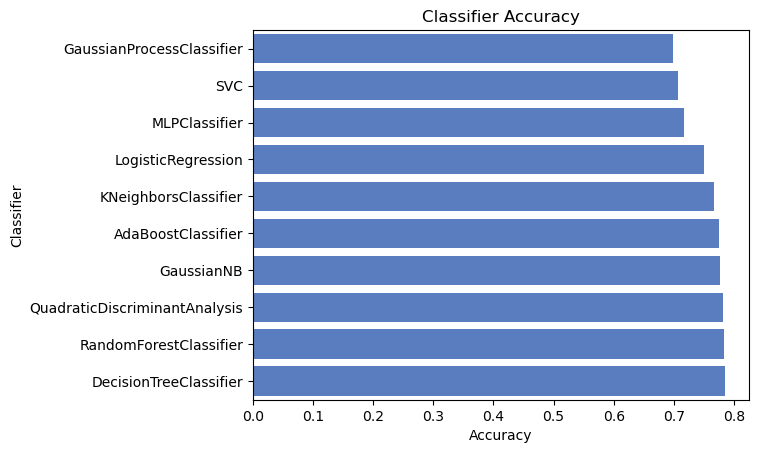

In [14]:
classifiers = [
    KNeighborsClassifier(n_neighbors = 8, metric = 'minkowski', p = 2), 
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth = 3),
    RandomForestClassifier(random_state=12345, n_estimators = 10),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),

    LogisticRegression(# метод для поиска решения. Для небольших датасетов лучше подходит liblinear, sag и saga -- для больших.
    # Варианты: newton-cg, lbfgs, liblinear, sag, saga
    solver='liblinear',
    # норма для регуляризации. Варианты: l2, l1.
    penalty='l2',
    # параметр регуляризации. Чем меньше, тем сильнее регуляризация. Положительный.
    C=1,
    # параметр для остановки поиска решения.
    tol=1e-4,
    # Так как распознается 2 класса.
    multi_class='ovr'),
]

log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

X_train = predict_train
X_valid = predict_valid
y_train = target_train
y_valid = target_valid

acc_dict = {}

memory = []

for clf in classifiers:
    name = clf.__class__.__name__
    clf.fit(X_train, y_train)
    acc = clf.score(X_valid, y_valid)
    
    memory.append(clf)
    if name in acc_dict:
        acc_dict[name] += acc
    else:
        acc_dict[name] = acc

for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf] 
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log.sort_values(by='Accuracy'), color="b")

display(log.sort_values(by='Accuracy'))

Построили 10 моделей. в рейтинге по валидационной выборке поббедили модели деревьев. Причем метод рандомных деревьев показал себя лучше.

## Проверьте модель на тестовой выборке

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Денис\AppData\Local\Temp\ipykernel_7772\1181028644.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)
C:\Users\Денис\AppData\Local\Temp\ipykernel_7772\1181028644.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_e

,Classifier,Accuracy
0,GaussianProcessClassifier,0.671851
0,SVC,0.684292
0,MLPClassifier,0.707621
0,LogisticRegression,0.743390
0,KNeighborsClassifier,0.748056
0,DecisionTreeClassifier,0.779160
0,QuadraticDiscriminantAnalysis,0.780715
0,GaussianNB,0.783826
0,RandomForestClassifier,0.788491
0,AdaBoostClassifier,0.800933


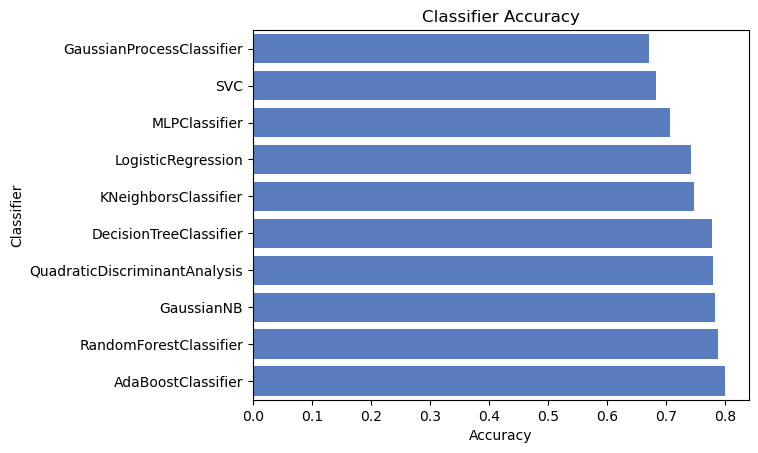

In [15]:
classifiers = [
    KNeighborsClassifier(n_neighbors = 8, metric = 'minkowski', p = 2), 
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth = 3),
    RandomForestClassifier(random_state=12345, n_estimators = 10),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),

    LogisticRegression(# метод для поиска решения. Для небольших датасетов лучше подходит liblinear, sag и saga -- для больших.
    # Варианты: newton-cg, lbfgs, liblinear, sag, saga
    solver='liblinear',
    # норма для регуляризации. Варианты: l2, l1.
    penalty='l2',
    # параметр регуляризации. Чем меньше, тем сильнее регуляризация. Положительный.
    C=1,
    # параметр для остановки поиска решения.
    tol=1e-4,
    # Так как распознается 2 класса.
    multi_class='ovr'),
]

log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

X_train = predict_train
X_test = predict_test
y_train = target_train
y_test = target_test

acc_dict = {}

for i in range(0,10):
    name = memory[i].__class__.__name__
    train_predictions = memory[i].predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    if name in acc_dict:
        acc_dict[name] += acc
    else:
        acc_dict[name] = acc

for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf] 
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log.sort_values(by='Accuracy'), color="b")

display(log.sort_values(by='Accuracy'))

На тестовой выборке лучше всего показала себя модель адаптивного бустинга. Accuracy которой превысила 80%
так же хорошо себя показал метод рандомных деревьев. остальные модели показали себя несколько хуже. Рейтинг деревьев класификации потерял свое первенство.

## (бонус) Проверьте модели на адекватность

In [16]:
dclf = DummyClassifier(strategy = 'most_frequent', random_state = 0)

dclf.fit(X_train, y_train)
score = dclf.score(X_test, y_test)

print(score)
    


0.6842923794712286


С помощью DummyClassifier(по совету в чате) сделали модель, которая предсказывала значения не опираясь на данные предикторов. для дальнейшего сравнения показателей.

<Figure size 640x480 with 0 Axes>

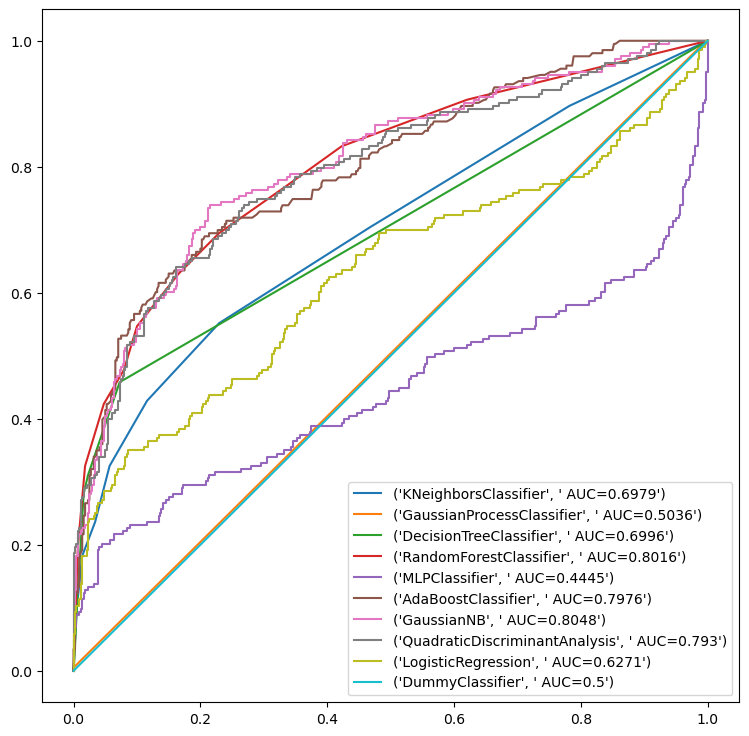

In [17]:
plt.figure(0).clf ();
plt.figure(figsize=(9, 9));
lst = [0,2,3,4,5,6,7,8,9]
for i in lst:
    y_pred = memory[i].predict_proba(X_test)[:, 1]
    fpr, tpr, _ = metrics.roc_curve (y_test, y_pred)
    auc = round(metrics.roc_auc_score (y_test, y_pred), 4)
    plt.plot (fpr,tpr,label=(memory[i].__class__.__name__, " AUC="+str(auc)));

y_pred = dclf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve (y_test, y_pred)
auc = round(metrics.roc_auc_score (y_test, y_pred), 4)
plt.plot (fpr,tpr,label=('DummyClassifier', " AUC="+str(auc)));

#add legend
plt.legend();

Анализ прогностической значимостьи с помощью ROC-кривых погазал, что наиболее хорошо показали себя 4 вида моделей. Среди которых оказались: Гауссовский наивный байесовский метод, метод рандомных деревьев, квадратичный дискриминационный анализ и модель адаптивного бустинга. 
По результатам всех изысканий рекомендуется использовать модель адаптивного бустинга или метод рандомных деревьев. 

## Проверьте модель переменных на категориальные
Возникла идея, что возможно модель будел лучше предсказывать если мы поменяем переменные на категориальные. попробуем проверить.

In [18]:
data['Cat_calls'] = pd.cut(data['calls'], 5, precision=0)
data[['Cat_calls', 'is_ultra']].groupby(['Cat_calls'],).mean().sort_values(by='Cat_calls', ascending=False)        

,is_ultra
Cat_calls,
"(120.0, 150.0]",0.854430
"(90.0, 120.0]",0.507463
"(60.0, 90.0]",0.218834
"(30.0, 60.0]",0.221470
"(-0.0, 30.0]",0.342574


Наблюдается не линейная зависимость поэтому первые 3 группы объединим в одну

In [19]:
data['Cat_calls'] = encoder.fit_transform(data['Cat_calls'])

for i in range(len(data['Cat_calls'])):
    if (data.loc[i,'Cat_calls'] == 0) or (data.loc[i,'Cat_calls'] == 1) or (data.loc[i,'Cat_calls'] == 2):
        data.loc[i,'Cat_calls'] == 0
    elif data.loc[i,'Cat_calls'] == 3:
        data.loc[i,'Cat_calls'] == 1
    else: data.loc[i,'Cat_calls'] == 2

In [20]:
data['Cat_minutes'] = pd.cut(data['minutes'], 5, precision=0)
data[['Cat_minutes', 'is_ultra']].groupby(['Cat_minutes'],).mean().sort_values(by='Cat_minutes', ascending=False)

,is_ultra
Cat_minutes,
"(800.0, 1000.0]",0.808612
"(600.0, 800.0]",0.430085
"(400.0, 600.0]",0.217631
"(200.0, 400.0]",0.216667
"(-1.0, 200.0]",0.347107


Наблюдается не линейная зависимость поэтому первые 3 группы объединим в одну

In [21]:
data['Cat_minutes'] = encoder.fit_transform(data['Cat_minutes'])

for i in range(len(data['Cat_minutes'])):
    if (data.loc[i,'Cat_minutes'] == 0) or (data.loc[i,'Cat_minutes'] == 1) or (data.loc[i,'Cat_minutes'] == 2):
        data.loc[i,'Cat_minutes'] == 0
    elif data.loc[i,'Cat_minutes'] == 3:
        data.loc[i,'Cat_minutes'] == 1
    else: data.loc[i,'Cat_minutes'] == 2

In [22]:
data['Cat_messages'] = pd.cut(data['messages'], 5, precision=0)
data[['Cat_messages', 'is_ultra']].groupby(['Cat_messages'],).mean().sort_values(by='Cat_messages', ascending=False)

,is_ultra
Cat_messages,
"(179.0, 224.0]",1.000000
"(134.0, 179.0]",0.936508
"(90.0, 134.0]",0.533937
"(45.0, 90.0]",0.295294
"(-0.0, 45.0]",0.262827


In [23]:
data['Cat_messages'] = encoder.fit_transform(data['Cat_messages'])

In [24]:
data['Cat_mb_used'] = pd.cut(data['mb_used'], 5, precision=0)
data[['Cat_mb_used', 'is_ultra']].groupby(['Cat_mb_used'],).mean().sort_values(by='Cat_mb_used', ascending=False)

,is_ultra
Cat_mb_used,
"(39797.0, 49746.0]",1.000000
"(29847.0, 39797.0]",0.854167
"(19898.0, 29847.0]",0.361364
"(9949.0, 19898.0]",0.196043
"(-50.0, 9949.0]",0.383838


In [25]:
data['Cat_mb_used'] = encoder.fit_transform(data['Cat_mb_used'])

for i in range(len(data['Cat_mb_used'])):
    if (data.loc[i,'Cat_mb_used'] == 0) or (data.loc[i,'Cat_mb_used'] == 1) or (data.loc[i,'Cat_mb_used'] == 2):
        data.loc[i,'Cat_mb_used'] == 0
    elif data.loc[i,'Cat_mb_used'] == 3:
        data.loc[i,'Cat_mb_used'] == 1
    else: data.loc[i,'Cat_mb_used'] == 2

In [26]:
data.head()

,calls,minutes,messages,mb_used,is_ultra,Cat_calls,Cat_minutes,Cat_messages,Cat_mb_used
0,40.0,311.90,83.0,19915.42,0,1,1,1,2
1,85.0,516.75,56.0,22696.96,0,2,2,1,2
2,77.0,467.66,86.0,21060.45,0,2,2,1,2
3,106.0,745.53,81.0,8437.39,1,3,3,1,0
4,66.0,418.74,1.0,14502.75,0,2,2,0,1


In [27]:
predict = data.drop(['is_ultra','calls','minutes','messages','mb_used','Cat_messages'], axis=1)
target = data['is_ultra']

predict_train, predict_test_vr, target_train, target_test_vr = train_test_split(predict, target, test_size=0.40, random_state=12345)

predict_valid, predict_test, target_valid, target_test = train_test_split(predict_test_vr, target_test_vr, test_size=0.50, random_state=12345)


Рапределили выборки на 3 части 60/20/20 обучающая/валидирующая/тестовая

## Исследуйте модели

In [28]:
#predict_train, target_train, predict_valid, predict_test, target_valid, target_test
best_model = None
best_result = 0
for i in range(1,11):
    model = DecisionTreeClassifier(random_state=12345, max_depth=i)
    model.fit(predict_train, target_train)
    result = model.score(predict_valid, target_valid)
    if result > best_result:
        best_result = result 
        best_max_depth = i
print(f'best max_depth = {best_max_depth} : {best_result}')

best max_depth = 7 : 0.7807153965785381


посмотрели оптимальную глубину дерева. Оптимальным оказалась глубина 7. Что в принципе предсказуемо, так как переменных немного

In [29]:
best_model = None
best_result = 0
for est in range(1, 11):
    model = RandomForestClassifier(random_state=12345, n_estimators=est) # обучите модель с заданным количеством деревьев
    model.fit(predict_train, target_train) # обучите модель на тренировочной выборке
    result = model.score(predict_valid, target_valid) # посчитайте качество модели на валидационной выборке
    if result > best_result:
        best_result = result # сохраните наилучшую модель
        best_n_estimators = est#  сохраните наилучшее значение метрики accuracy на валидационных данных

print(f'best_n_estimators = {best_n_estimators} : {best_result}')

best_n_estimators = 2 : 0.7807153965785381


Подбор количества рандомных деревьев показал оптимальное количество в 2

In [30]:
model = LogisticRegression(solver='liblinear',
    # норма для регуляризации. 
    penalty='l2',
    # параметр регуляризации. Чем меньше, тем сильнее регуляризация. Положительный.
    C=1,
    # параметр для остановки поиска решения.
    tol=1e-4,
    # Так как распознается 2 класса.
    multi_class='ovr')
model.fit(predict_train, target_train) # обучите модель на тренировочной выборке
result = model.score(predict_valid, target_valid) # посчитайте качество модели на валидационной выборке
print(f'result = {result}')

result = 0.7387247278382582


Для логистической регрессии были поставлены рекомендуемые параметры.

In [31]:
best_model = None
best_result = 0
for neigh in range(1, 11):
    model = KNeighborsClassifier(n_neighbors = neigh, metric = 'minkowski', p = 2)
    model.fit(predict_train, target_train) # обучите модель на тренировочной выборке
    result = model.score(predict_valid, target_valid) # посчитайте качество модели на валидационной выборке
    if result > best_result:
        best_result = result # сохраните наилучшую модель
        best_n_neighbors = neigh#  сохраните наилучшее значение метрики accuracy на валидационных данных

print(f'best_n_neighbors = {best_n_neighbors} : {best_result}')

best_n_neighbors = 4 : 0.7589424572317263


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Подбор оптимального количества соседей показал, что более оптимально подбирать область анализирую 4 соседа

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Денис\AppData\Local\Temp\ipykernel_7772\461099129.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)
C:\Users\Денис\AppData\Local\Temp\ipykernel_7772\461099129.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_ent

,Classifier,Accuracy
0,LogisticRegression,0.738725
0,KNeighborsClassifier,0.758942
0,QuadraticDiscriminantAnalysis,0.772939
0,MLPClassifier,0.774495
0,GaussianNB,0.774495
0,SVC,0.777605
0,GaussianProcessClassifier,0.777605
0,AdaBoostClassifier,0.779160
0,DecisionTreeClassifier,0.780715
0,RandomForestClassifier,0.780715


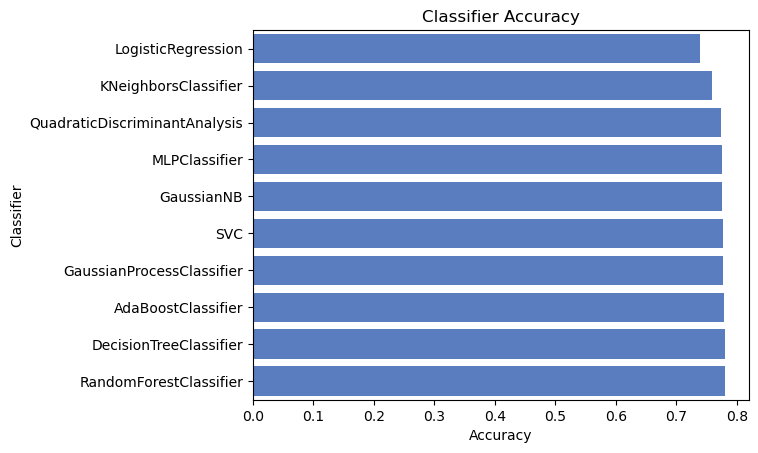

In [32]:
classifiers = [
    KNeighborsClassifier(n_neighbors = 4, metric = 'minkowski', p = 2), 
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth = 7),
    RandomForestClassifier(random_state=12345, n_estimators = 2),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),

    LogisticRegression(# метод для поиска решения. Для небольших датасетов лучше подходит liblinear, sag и saga -- для больших.
    # Варианты: newton-cg, lbfgs, liblinear, sag, saga
    solver='liblinear',
    # норма для регуляризации. Варианты: l2, l1.
    penalty='l2',
    # параметр регуляризации. Чем меньше, тем сильнее регуляризация. Положительный.
    C=1,
    # параметр для остановки поиска решения.
    tol=1e-4,
    # Так как распознается 2 класса.
    multi_class='ovr'),
]

log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

X_train = predict_train
X_valid = predict_valid
y_train = target_train
y_valid = target_valid

acc_dict = {}

memory = []

for clf in classifiers:
    name = clf.__class__.__name__
    clf.fit(X_train, y_train)
    acc = clf.score(X_valid, y_valid)
    
    memory.append(clf)
    if name in acc_dict:
        acc_dict[name] += acc
    else:
        acc_dict[name] = acc

for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf] 
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log.sort_values(by='Accuracy'), color="b")

display(log.sort_values(by='Accuracy'))

Построили 10 моделей. в рейтинге по валидационной выборке поббедили модели деревьев. Причем метод рандомных деревьев показал себя лучше.

## Проверьте модель на тестовой выборке

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Денис\AppData\Local\Temp\ipykernel_7772\1181028644.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)
C:\Users\Денис\AppData\Local\Temp\ipykernel_7772\1181028644.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_e

,Classifier,Accuracy
0,LogisticRegression,0.737170
0,KNeighborsClassifier,0.748056
0,SVC,0.772939
0,GaussianNB,0.774495
0,QuadraticDiscriminantAnalysis,0.776050
0,DecisionTreeClassifier,0.777605
0,RandomForestClassifier,0.777605
0,AdaBoostClassifier,0.777605
0,GaussianProcessClassifier,0.782271
0,MLPClassifier,0.783826


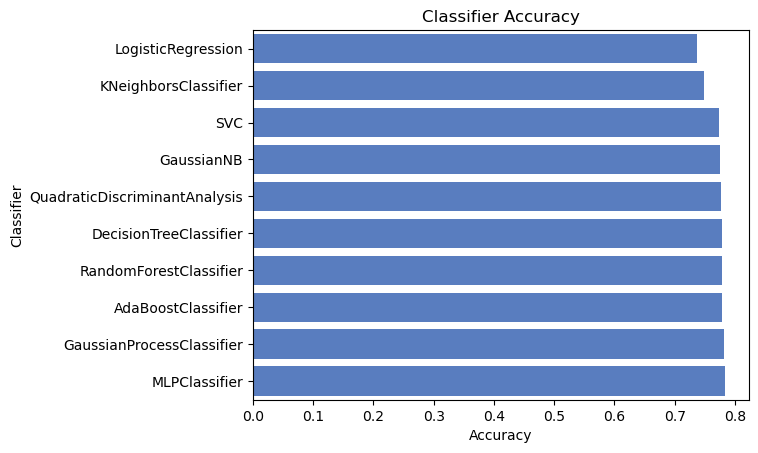

In [33]:
classifiers = [
    KNeighborsClassifier(n_neighbors = 8, metric = 'minkowski', p = 2), 
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth = 3),
    RandomForestClassifier(random_state=12345, n_estimators = 10),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),

    LogisticRegression(# метод для поиска решения. Для небольших датасетов лучше подходит liblinear, sag и saga -- для больших.
    # Варианты: newton-cg, lbfgs, liblinear, sag, saga
    solver='liblinear',
    # норма для регуляризации. Варианты: l2, l1.
    penalty='l2',
    # параметр регуляризации. Чем меньше, тем сильнее регуляризация. Положительный.
    C=1,
    # параметр для остановки поиска решения.
    tol=1e-4,
    # Так как распознается 2 класса.
    multi_class='ovr'),
]

log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

X_train = predict_train
X_test = predict_test
y_train = target_train
y_test = target_test

acc_dict = {}

for i in range(0,10):
    name = memory[i].__class__.__name__
    train_predictions = memory[i].predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    if name in acc_dict:
        acc_dict[name] += acc
    else:
        acc_dict[name] = acc

for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf] 
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log.sort_values(by='Accuracy'), color="b")

display(log.sort_values(by='Accuracy'))

Рейтинг деревьев класификации потерял свое первенство.

## (бонус) Проверьте модели на адекватность

In [34]:
dclf = DummyClassifier(strategy = 'most_frequent', random_state = 0)

dclf.fit(X_train, y_train)
score = dclf.score(X_test, y_test)

print(score)
    


0.6842923794712286


С помощью DummyClassifier(по совету в чате) сделали модель, которая предсказывала значения не опираясь на данные предикторов. для дальнейшего сравнения показателей.

<Figure size 640x480 with 0 Axes>

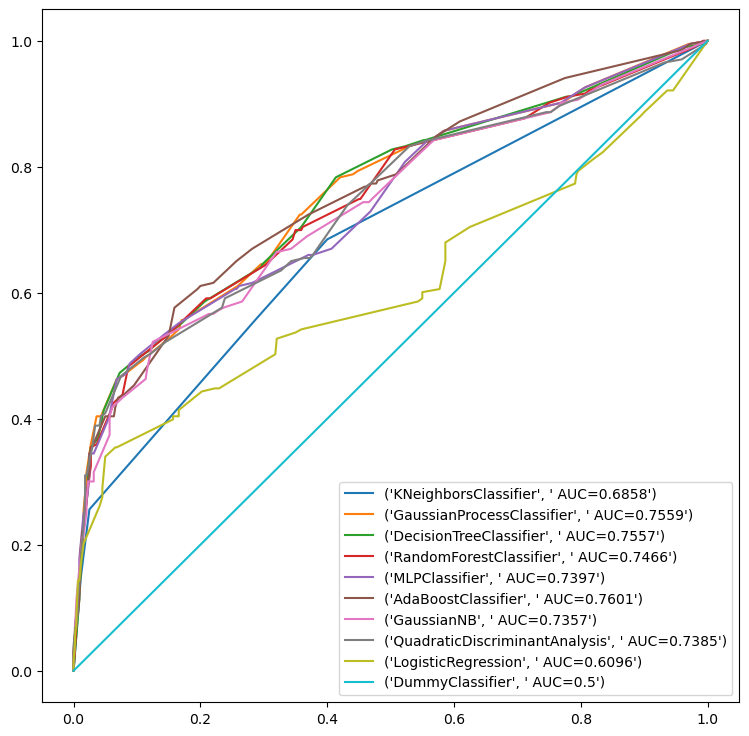

In [35]:
plt.figure(0).clf ();
plt.figure(figsize=(9, 9));
lst = [0,2,3,4,5,6,7,8,9]
for i in lst:
    y_pred = memory[i].predict_proba(X_test)[:, 1]
    fpr, tpr, _ = metrics.roc_curve (y_test, y_pred)
    auc = round(metrics.roc_auc_score (y_test, y_pred), 4)
    plt.plot (fpr,tpr,label=(memory[i].__class__.__name__, " AUC="+str(auc)));

y_pred = dclf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve (y_test, y_pred)
auc = round(metrics.roc_auc_score (y_test, y_pred), 4)
plt.plot (fpr,tpr,label=('DummyClassifier', " AUC="+str(auc)));

#add legend
plt.legend();

В целом улучшить прогнозирование не получилось. япредсказание без категорирования переменных оказалось лучше. 

## Общие выводы

Были проанализированы данные о поведении клиентов, которые уже перешли на эти тарифы.
Мы попытались построить модель для задачи классификации, которая выберет подходящий тариф. 

Считали данные. Из представленных данных видно, что пропущенных данных нет. формат данных соответствует необходимым.
Распределение количества звонков на графике выглядит хорошо. Имеет форму нормального распределения.
Исправлять данные нет необходимости. На последнем этапе убрал хвост и вместо всех значений больше 150 минут поставили 150 минут.
Распределение данных по количеству минут также имеет форму нормаьного распределения. Обрезаны данные выше 1000 минут, с целью улучшения модели.
Количество сообщений сильно разнится по количеству. Есть люди которые совсем не пишут сообщения. форма распределения не нормальная.
Форма распределения по количеству трафика имеет практически идеальный вид нормального распределения.

Количество пользователей тарифа ультра практически в два раза ниже. очевидно , что больше людей предпочитают Смарт

Рапределили выборки на 3 части 60/20/20 обучающая/валидирующая/тестовая

Нашли оптимальную глубину дерева. Оптимальным оказалась глубина 3. 
Подбор количества рандомных деревьев показал оптимальное количество в 10
Подбор оптимального количества соседей показал, что более оптимально подбирать область анализирую 4 соседа
Построили 10 моделей. в рейтинге по валидационной выборке поббедили модели деревьев. Причем метод рандомных деревьев показал себя лучше.
Однако на тестовой выборке лучше всего показала себя модель адаптивного бустинга. Accuracy которой превысила 80%
так же хорошо себя показал метод рандомных деревьев. остальные модели показали себя несколько хуже. Рейтинг деревьев класификации потерял свое первенство.
С помощью DummyClassifier сделали модель, которая предсказывала значения не опираясь на данные предикторов. для дальнейшего сравнения показателей.

Анализ прогностической значимостьи с помощью ROC-кривых погазал, что наиболее хорошо показали себя 4 вида моделей. Среди которых оказались: Гауссовский наивный байесовский метод, метод рандомных деревьев, квадратичный дискриминационный анализ и модель адаптивного бустинга. 
По результатам всех изысканий рекомендуется использовать модель адаптивного бустинга или метод рандомных деревьев. 

Также была попытка поменять переменные на категориальные. Но такая замена не улучшила модель. 

В целом исследование показало, что можно построить достаточно хорошую модель с уровнем правильных предсказаний 80%

Для дальнейшего улучшения моделей стоит обработать данные в низких значениях показателей, так как они имеют не линейную зависимость. 

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x] Jupyter Notebook открыт
- [x] Весь код исполняется без ошибок
- [x] Ячейки с кодом расположены в порядке исполнения
- [x] Выполнено задание 1: данные загружены и изучены
- [x] Выполнено задание 2: данные разбиты на три выборки
- [x] Выполнено задание 3: проведено исследование моделей
    - [x] Рассмотрено больше одной модели
    - [x] Рассмотрено хотя бы 3 значения гипепараметров для какой-нибудь модели
    - [x] Написаны выводы по результатам исследования
- [x] Выполнено задание 3: Проведено тестирование
- [x] Удалось достичь accuracy не меньше 0.75
